#### Problem Statement : Predict next-day rain by training classification models on the target variable RainTomorrow ( by DecisionTree , RandomForest & Hyperparameter Tunning )

## Dataset Importing & Libraries Loading
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import plot_tree , export_text

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams["font.weight"] = "bold"

In [3]:
rain = pd.read_csv("D:/Primary Things/Projects/Rain in Australia/Dataset/weatherAUS.csv")

In [4]:
rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
rain.dropna( subset=['RainToday','RainTomorrow'] , inplace = True )

We will not do EDA for this dataset as it is already done in Logistic Regression notebook.

## Data Preprocessing
1. Training , Test & Validation Test
2. Identifying Input & Target Columns & Updating to Train,Test & Val Set
3. Identifying Numeric & Categorcial Columns
4. Imputing Missing Numeric Values
5. Scaling the Data
6. Encoding Categorical Data
7. Loding scaled & encoded data back to Train,Test,Val Inputs

***

### Training , Test and Validation Test

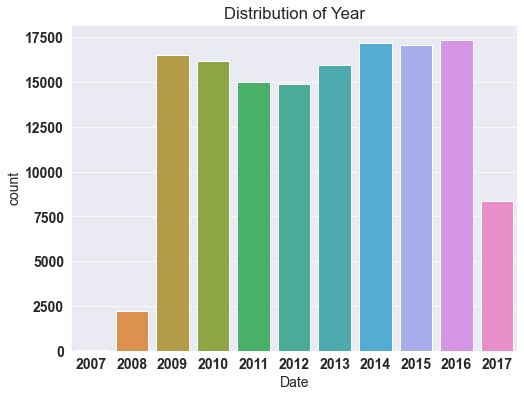

In [8]:
plt.title('Distribution of Year')
sns.countplot( x = pd.to_datetime(rain.Date).dt.year , data = rain)
plt.show()

In [9]:
train_val_df , test_df = train_test_split(rain , test_size = 0.2 , random_state = 42)
train_df , val_df = train_test_split(train_val_df , test_size = 0.25 , random_state = 42)

In [10]:
print('train.df.shape',train_df.shape)
print('val.df.shape',val_df.shape)
print('test.df.shape',test_df.shape)

train.df.shape (84471, 23)
val.df.shape (28158, 23)
test.df.shape (28158, 23)


Now the distribution of data according to year

In [11]:
year = pd.to_datetime(rain.Date).dt.year

In [12]:
train_df = rain[year < 2015]
val_df = rain[ year == 2015]
test_df = rain[ year > 2015]

In [13]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


### Identifying Input & Target Columns

In [14]:
input_cols = list(rain.columns)[1:-1]
target_col = 'RainTomorrow'

In [15]:
print(input_cols)
print(target_col)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
RainTomorrow


In [16]:
train_input = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [17]:
val_input = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [18]:
test_input = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

### Identifying Numerical & Categorical Columns

In [19]:
numeric_cols = train_input.select_dtypes( include = np.number ).columns.tolist()
categorical_cols = train_input.select_dtypes('object').columns.tolist()

In [20]:
print(numeric_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [21]:
train_input[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [22]:
train_input[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

### Imputing Missing Numeric Data

In [23]:
imputer = SimpleImputer(strategy = 'mean')

In [24]:
rain[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [25]:
imputer.fit(rain[numeric_cols])

SimpleImputer()

In [26]:
train_input[numeric_cols] = imputer.transform(train_input[numeric_cols])
val_input[numeric_cols] = imputer.transform(val_input[numeric_cols])
test_input[numeric_cols] = imputer.transform(test_input[numeric_cols])

### Scaling the Data

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(rain[numeric_cols])

MinMaxScaler()

In [29]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
val_input[numeric_cols] = scaler.transform(val_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])

In [30]:
train_input[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


### Encoding Categorical Data

In [31]:
encoder = OneHotEncoder( sparse = False , handle_unknown = 'ignore')

In [32]:
encoder.fit(rain[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [33]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [34]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
val_input[encoded_cols] = encoder.transform(val_input[categorical_cols])
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])

C:\Users\HP\AppData\Local\Temp\ipykernel_2912\121031197.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
C:\Users\HP\AppData\Local\Temp\ipykernel_2912\121031197.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
C:\Users\HP\AppData\Local\Temp\ipykernel_2912\121031197.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

In [35]:
train_input.shape

(97988, 123)

In [36]:
X_train = train_input[numeric_cols + encoded_cols]
X_val = val_input[numeric_cols + encoded_cols]
X_test = test_input[numeric_cols + encoded_cols]

## Decision Tree 
***

### Training

In [37]:
model = DecisionTreeClassifier( random_state = 42 )

In [38]:
model.fit(X_train , train_target)

DecisionTreeClassifier(random_state=42)

### Evaluation

In [39]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [40]:
accuracy_score(train_target,train_preds)

0.9999795893374699

Although the model is giving very high accuracy score on the training dataset , let's check also on validation set.

In [41]:
model.score(X_val,val_target)

0.7936684416876353

### Visualization

In [42]:
model.tree_.max_depth

49

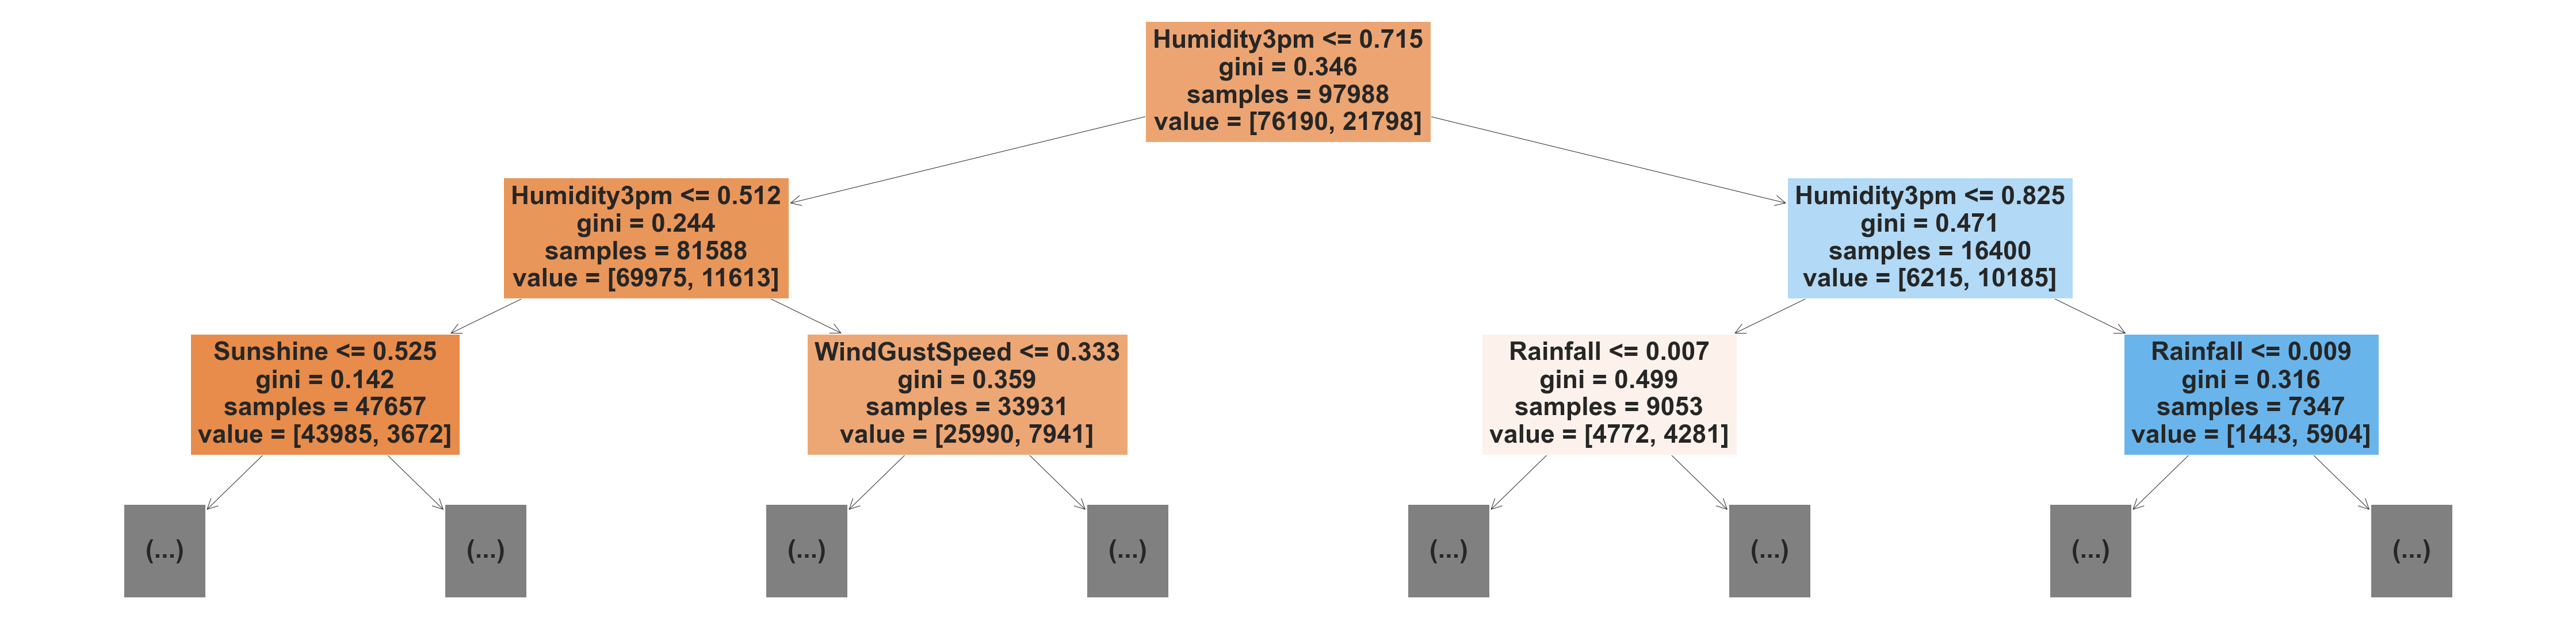

In [43]:
plt.figure(figsize = (80,20))
plot_tree( model , feature_names = X_train.columns , max_depth = 2 , filled = True);

### Feature Importance

In [44]:
model.feature_importances_

array([3.72348864e-02, 3.02750170e-02, 4.46807871e-02, 2.31016443e-02,
       4.74029876e-02, 6.02158346e-02, 2.59596261e-02, 2.87123098e-02,
       3.72718924e-02, 2.78696714e-01, 3.74751640e-02, 6.22463592e-02,
       1.50293521e-02, 1.72695492e-02, 3.51997396e-02, 3.28171151e-02,
       2.07437921e-03, 1.64079963e-03, 1.01783054e-03, 6.88212657e-04,
       1.48034667e-03, 1.10335980e-03, 1.19280342e-03, 1.77001797e-03,
       8.18956871e-04, 1.30986391e-03, 8.00314193e-04, 2.03677225e-03,
       1.38645663e-03, 4.84888047e-04, 6.08349928e-04, 1.26483304e-03,
       1.45258514e-04, 1.50514431e-03, 1.07182434e-03, 1.44829853e-03,
       9.12938347e-04, 8.15936194e-04, 1.26468932e-03, 1.49092396e-03,
       6.60526489e-04, 7.09652768e-04, 1.02344514e-03, 1.54844869e-03,
       1.31824900e-03, 6.07286685e-04, 5.04774518e-04, 1.50976724e-03,
       1.36782184e-03, 2.12844007e-03, 1.24769141e-03, 1.92047622e-03,
       1.46145581e-03, 2.12670031e-03, 1.36401119e-03, 4.10431985e-04,
      

In [45]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

In [46]:
importance_df[:10]

,feature,importance
9,Humidity3pm,0.278697
11,Pressure3pm,0.062246
5,WindGustSpeed,0.060216
4,Sunshine,0.047403
2,Rainfall,0.044681
10,Pressure9am,0.037475
8,Humidity9am,0.037272
0,MinTemp,0.037235
14,Temp9am,0.035200
15,Temp3pm,0.032817


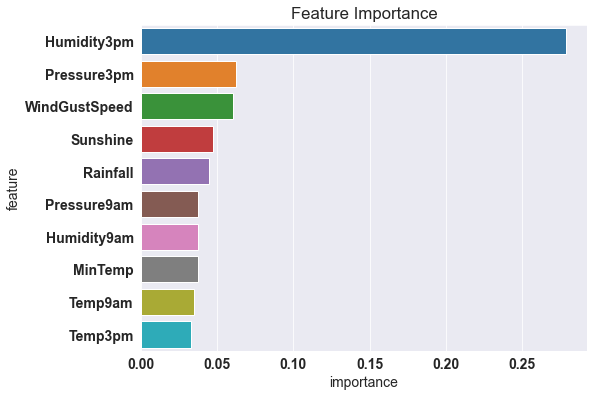

In [47]:
plt.title('Feature Importance')
sns.barplot(data = importance_df[:10] , x = 'importance' , y = 'feature')
plt.show()

## Hyperparameter Tuninng
***

### Finding Optimal Max Depth

In [48]:
def max_depth_error(md):
    model = DecisionTreeClassifier( random_state = 42 , max_depth = md)
    model.fit(X_train , train_target)
    train_acc = 1 - model.score(X_train , train_target)
    val_acc = 1 - model.score(X_val , val_target)
    return {'max_depth' : md , 'Training Error' : train_acc , 'Validation Error' : val_acc}

In [49]:
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [50]:
error_df

,max_depth,Training Error,Validation Error
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153131,0.155831
6,7,0.149059,0.154602
7,8,0.144814,0.153842
8,9,0.139435,0.154544
9,10,0.131802,0.154778


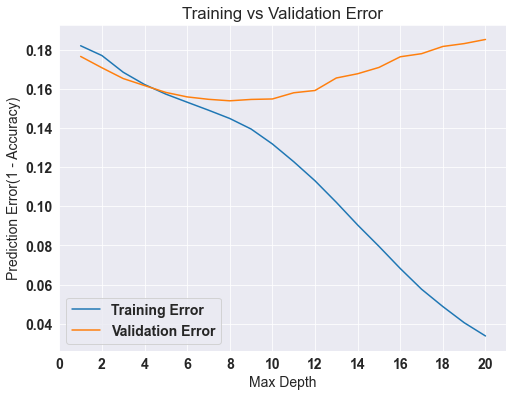

In [51]:
plt.figure()
plt.plot(error_df['max_depth'] , error_df['Training Error'])
plt.plot(error_df['max_depth'] , error_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error(1 - Accuracy)')
plt.legend(['Training Error','Validation Error'])
plt.show()

Max depth 7 seems good.

In [52]:
model = DecisionTreeClassifier( random_state = 42 , max_depth = 7 ).fit(X_train,train_target)
print('Training model accuracy : ' ,  model.score(X_train,train_target))
print('Validation model accuracy : ' ,  model.score(X_val,val_target))

Training model accuracy :  0.8509409315426378
Validation model accuracy :  0.8453976242027035


In [53]:
tree_text = export_text(model, feature_names=list(X_train.columns))
print(tree_text[:1000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- WindGustDir_N >  0.50
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |--- Humidity3pm >  0.24
|   |   |   |   |   |   |--- Sunshine <= 0.37
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.37
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindGustSpeed <= 0.53
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- WindGustSpeed >  0.53
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Cloud3pm <= 0.39
|   |   |   |  

### Limiting Max Leaf Nodes

In [54]:
model = DecisionTreeClassifier( max_leaf_nodes = 128 , random_state=42).fit(X_train,train_target)

In [55]:
model.score(X_train,train_target)

0.852696248520227

In [56]:
model.score(X_val,val_target)

0.8471531394464276

In [57]:
model.tree_.max_depth

11

## Accuracy for Test Set

In [58]:
model.score(X_test,test_target)

0.8339556592765461

# Using Random Forest
***

### Training

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model = RandomForestClassifier(n_jobs=-1 , random_state = 42)

In [61]:
model.fit(X_train , train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [62]:
model.score(X_train,train_target)

0.9999693840062048

In [63]:
model.score(X_val,val_target)

0.8567499561121189

The training is still almost 100% but the validation set accuracy increases significantly which is much better than training single tree.

### Visualization

In [64]:
len(model.estimators_)

100

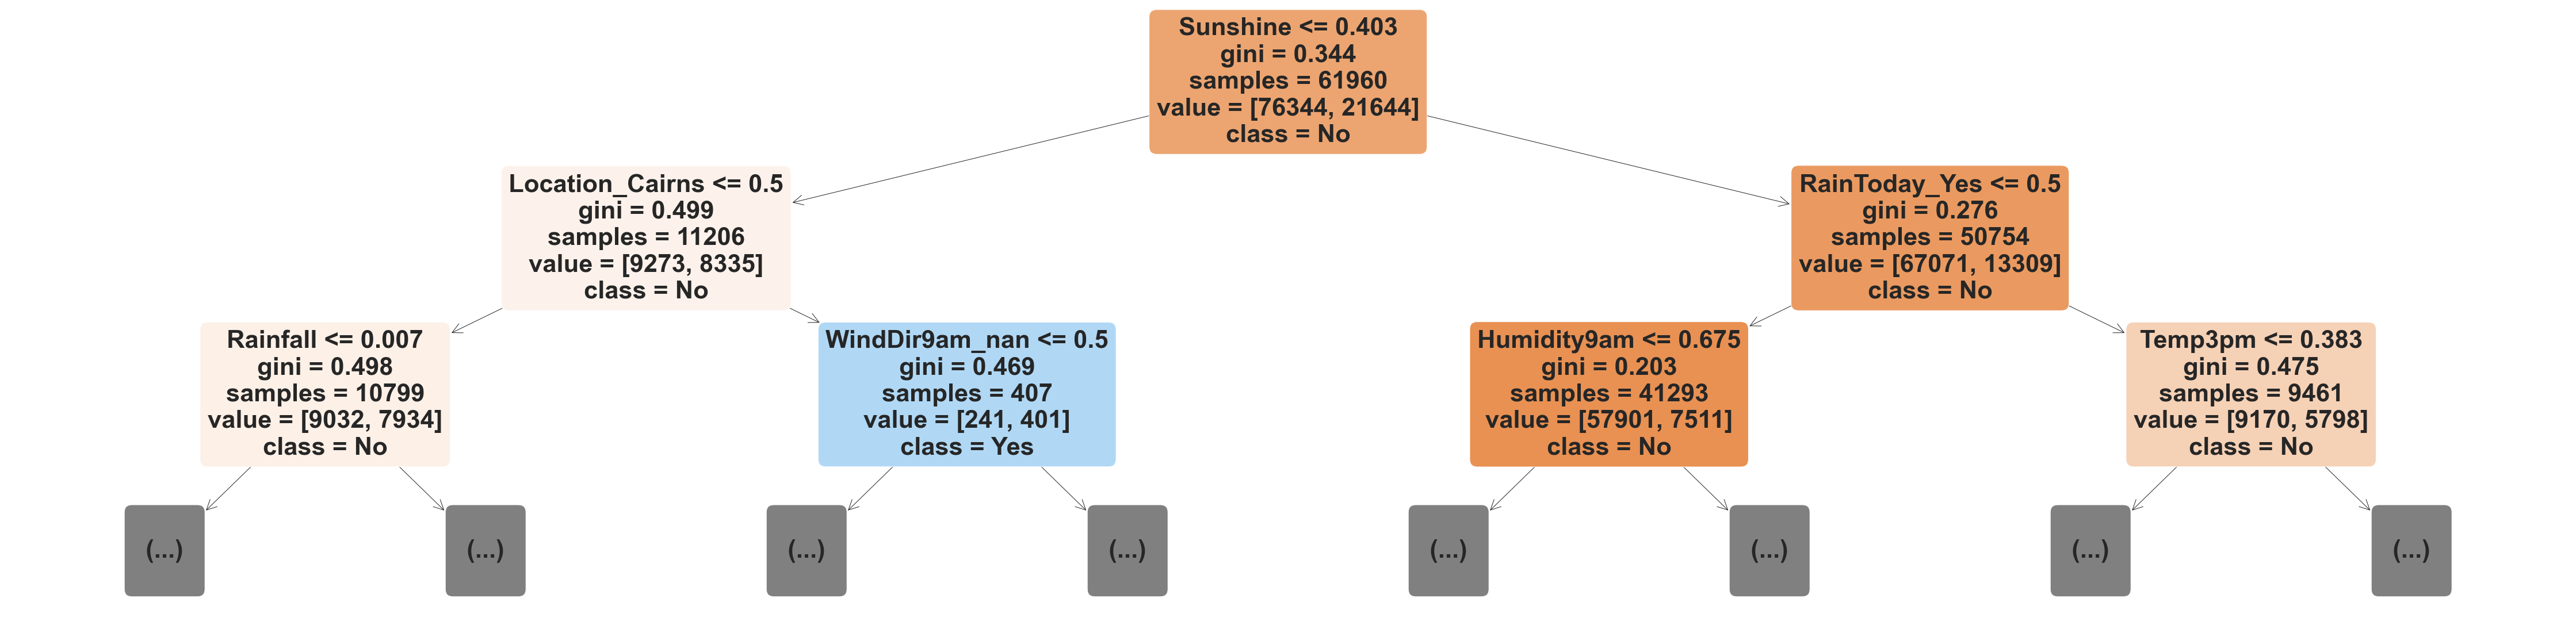

In [65]:
plt.figure(figsize = (80,20))
plot_tree(model.estimators_[0] , max_depth = 2 ,feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

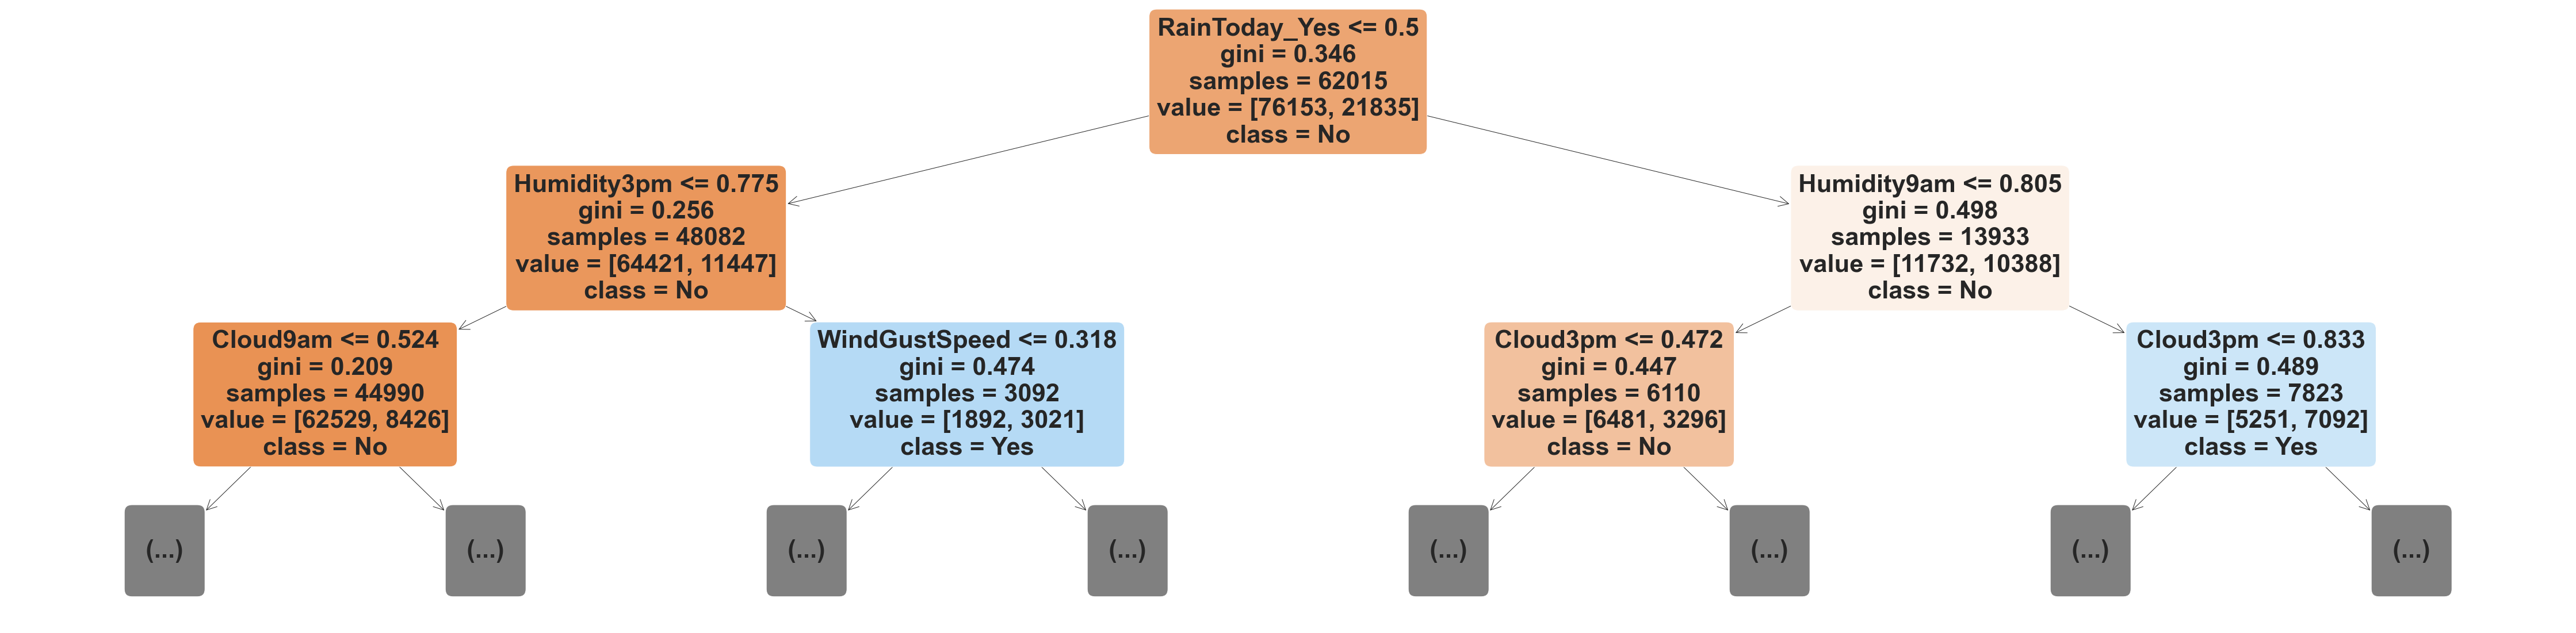

In [66]:
plt.figure(figsize = (80,20))
plot_tree(model.estimators_[26] , max_depth = 2 ,feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

### Feature Importance

In [67]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

In [68]:
importance_df[:10]

,feature,importance
9,Humidity3pm,0.129273
4,Sunshine,0.059835
11,Pressure3pm,0.053178
8,Humidity9am,0.051036
10,Pressure9am,0.049215
5,WindGustSpeed,0.047183
2,Rainfall,0.046710
15,Temp3pm,0.046196
1,MaxTemp,0.042871
0,MinTemp,0.042163


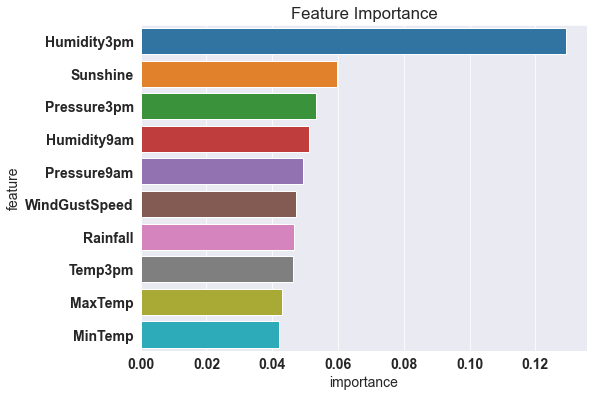

In [69]:
plt.title('Feature Importance')
sns.barplot(data = importance_df[:10] , x = 'importance' , y = 'feature')
plt.show()

## Hyperparameter Tuning with Random Forest

In [72]:
base_model = RandomForestClassifier( n_jobs=-1 , random_state = 42).fit(X_train,train_target)

In [73]:
base_train_acc = model.score(X_train , train_target)
base_val_acc = model.score(X_val , val_target)

In [74]:
base_acc = base_train_acc , base_val_acc
base_acc

(0.9999693840062048, 0.8567499561121189)

### n-estimator

In [87]:
def n_est_error(n):
    model = RandomForestClassifier( random_state = 42 , n_jobs=-1 , n_estimators = n)
    model.fit(X_train , train_target)
    train_acc = model.score(X_train , train_target)
    val_acc = model.score(X_val , val_target)
    return {'n_estimator' : n , 'Training Accuracy' : train_acc , 'Validation Accuracy' : val_acc}

In [88]:
error_df = pd.DataFrame([n_est_error(n) for n in range(100,500,100)])

In [89]:
error_df

,n_estimator,Training Accuracy,Validation Accuracy
0,100,0.999969,0.856750
1,200,0.999980,0.858330
2,300,0.999980,0.857218
3,400,0.999980,0.857511


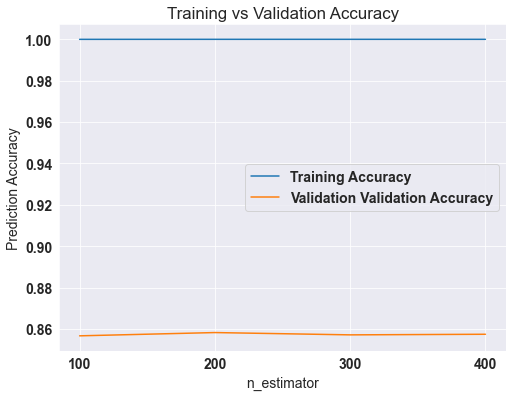

In [90]:
plt.figure()
plt.plot(error_df['n_estimator'] , error_df['Training Accuracy'])
plt.plot(error_df['n_estimator'] , error_df['Validation Accuracy'])
plt.title('Training vs Validation Accuracy')
plt.xticks(range(100,500,100))
plt.xlabel('n_estimator')
plt.ylabel('Prediction Accuracy')
plt.legend(['Training Accuracy','Validation Validation Accuracy'])
plt.show()

- For training accuracy it become stagant for any no of n_estimator.
- For validation set accuracy seems high at n_estimator 200 after that it becomes constant.

### Max Depth

In [93]:
def max_depth_error(md):
    model = RandomForestClassifier( random_state = 42 , max_depth = md)
    model.fit(X_train , train_target)
    train_acc = 1 - model.score(X_train , train_target)
    val_acc = 1 - model.score(X_val , val_target)
    return {'max_depth' : md , 'Training Error' : train_acc , 'Validation Error' : val_acc}

In [94]:
error_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [95]:
error_df

,max_depth,Training Error,Validation Error
0,1,0.222456,0.209374
1,2,0.222435,0.209374
2,3,0.203433,0.196267
3,4,0.189299,0.184154
4,5,0.178093,0.173855
5,6,0.168919,0.167125
6,7,0.160683,0.161976
7,8,0.156203,0.159108
8,9,0.150784,0.157119
9,10,0.143814,0.153959


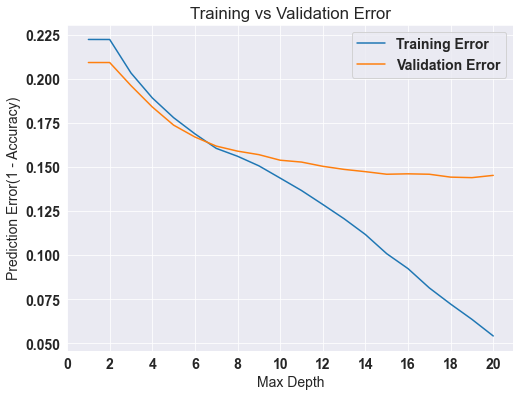

In [96]:
plt.figure()
plt.plot(error_df['max_depth'] , error_df['Training Error'])
plt.plot(error_df['max_depth'] , error_df['Validation Error'])
plt.title('Training vs Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error(1 - Accuracy)')
plt.legend(['Training Error','Validation Error'])
plt.show()

Max depth of 7 is good